In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("farmer_data.csv")
print("\nSummary Statistics:")
print(df.info())



Summary Statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       854 non-null    int64  
 1   Month                                      854 non-null    object 
 2   Day                                        854 non-null    int64  
 3   Day Name                                   854 non-null    object 
 4   Festival_Flag                              854 non-null    int64  
 5   Sum of Max Price (Rs./Quintal)             854 non-null    int64  
 6   Sum of Min Price (Rs./Quintal)             854 non-null    int64  
 7   Sum of Modal Price (Rs./Quintal)           854 non-null    int64  
 8   Sum of Month/Season                        854 non-null    int64  
 9   Sum of rainfall_delhi_azadpur.Rainfall_mm  854 non-null    float64
 10  Sum o

In [28]:
import pandas as pd

# Load CSV
df = pd.read_csv("farmer_data.csv")

# Rename columns for simplicity
df = df.rename(columns={
    "Sum of Max Price (Rs./Quintal)": "Max_Price",
    "Sum of Min Price (Rs./Quintal)": "Min_Price",
    "Sum of Modal Price (Rs./Quintal)": "Modal_Price",
    "Sum of Month/Season": "Season_Num",
    "Sum of rainfall_delhi_azadpur.Rainfall_mm": "Rainfall_mm",
    "Sum of temperature_data.Temp_C": "Temp_C"
})

# Create Date column
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]].astype(str).agg("-".join, axis=1),
                            errors="coerce")

print(df.head())


   Year      Month  Day  Day Name  Festival_Flag  Max_Price  Min_Price  \
0  2022  September    1  Thursday              0       2000        600   
1  2022  September    2    Friday              0       2800        800   
2  2022  September    3  Saturday              0       3200        800   
3  2022  September    5    Monday              0       4000        800   
4  2022  September    6   Tuesday              0       3600        800   

   Modal_Price  Season_Num  Rainfall_mm  Temp_C       Date  
0         1407           9         0.19   32.42 2022-09-01  
1         1921           9         2.41   32.59 2022-09-02  
2         2364           9         0.02   31.96 2022-09-03  
3         2727           9         0.01   31.55 2022-09-05  
4         2550           9         0.00   31.61 2022-09-06  


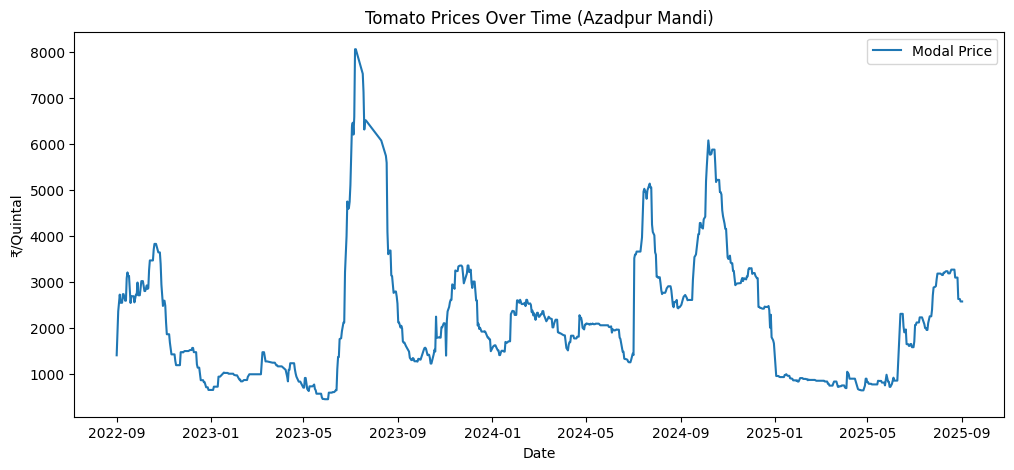

In [11]:
# Price trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Modal_Price"], label="Modal Price")
plt.xlabel("Date")
plt.ylabel("₹/Quintal")
plt.title("Tomato Prices Over Time (Azadpur Mandi)")
plt.legend()
plt.show()


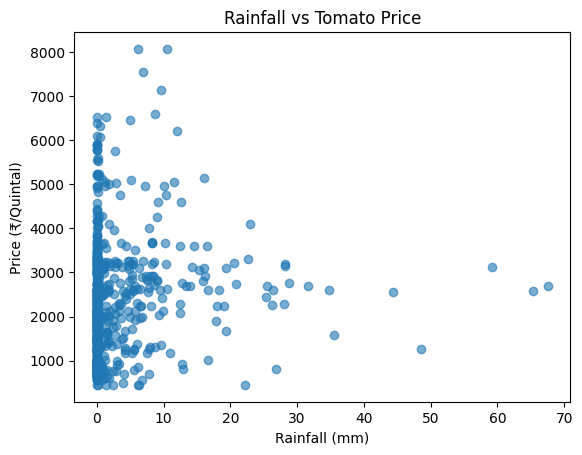

In [12]:
plt.scatter(df["Rainfall_mm"], df["Modal_Price"], alpha=0.6)
plt.xlabel("Rainfall (mm)")
plt.ylabel("Price (₹/Quintal)")
plt.title("Rainfall vs Tomato Price")
plt.show()


               Max_Price  Min_Price  Modal_Price  Rainfall_mm    Temp_C  \
Max_Price       1.000000   0.794069     0.972919     0.164830  0.177324   
Min_Price       0.794069   1.000000     0.872379     0.159951  0.115645   
Modal_Price     0.972919   0.872379     1.000000     0.161022  0.143467   
Rainfall_mm     0.164830   0.159951     0.161022     1.000000  0.161561   
Temp_C          0.177324   0.115645     0.143467     0.161561  1.000000   
Festival_Flag  -0.039032  -0.022712    -0.024100    -0.066633  0.025171   
Season_Num      0.413625   0.356545     0.429915     0.081911  0.030423   

               Festival_Flag  Season_Num  
Max_Price          -0.039032    0.413625  
Min_Price          -0.022712    0.356545  
Modal_Price        -0.024100    0.429915  
Rainfall_mm        -0.066633    0.081911  
Temp_C              0.025171    0.030423  
Festival_Flag       1.000000   -0.005184  
Season_Num         -0.005184    1.000000  


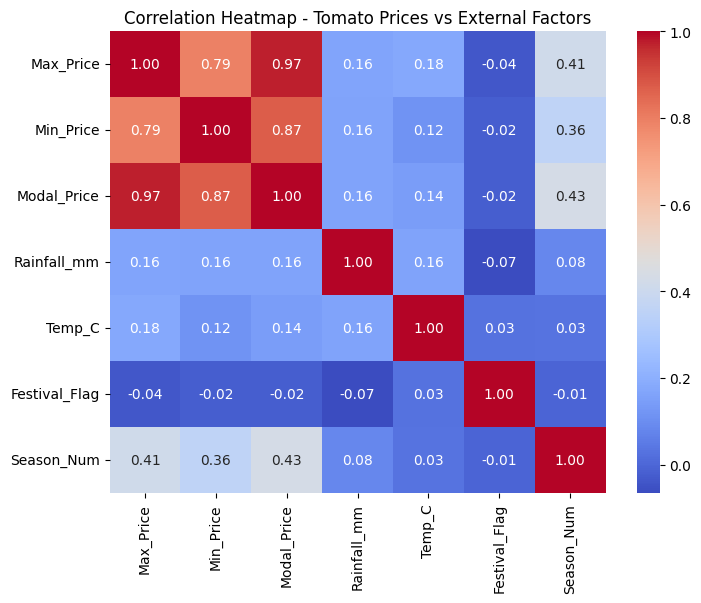

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation
corr_cols = ["Max_Price", "Min_Price", "Modal_Price", 
             "Rainfall_mm", "Temp_C", "Festival_Flag", "Season_Num"]

corr_matrix = df[corr_cols].corr()

print(corr_matrix)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Tomato Prices vs External Factors")
plt.show()


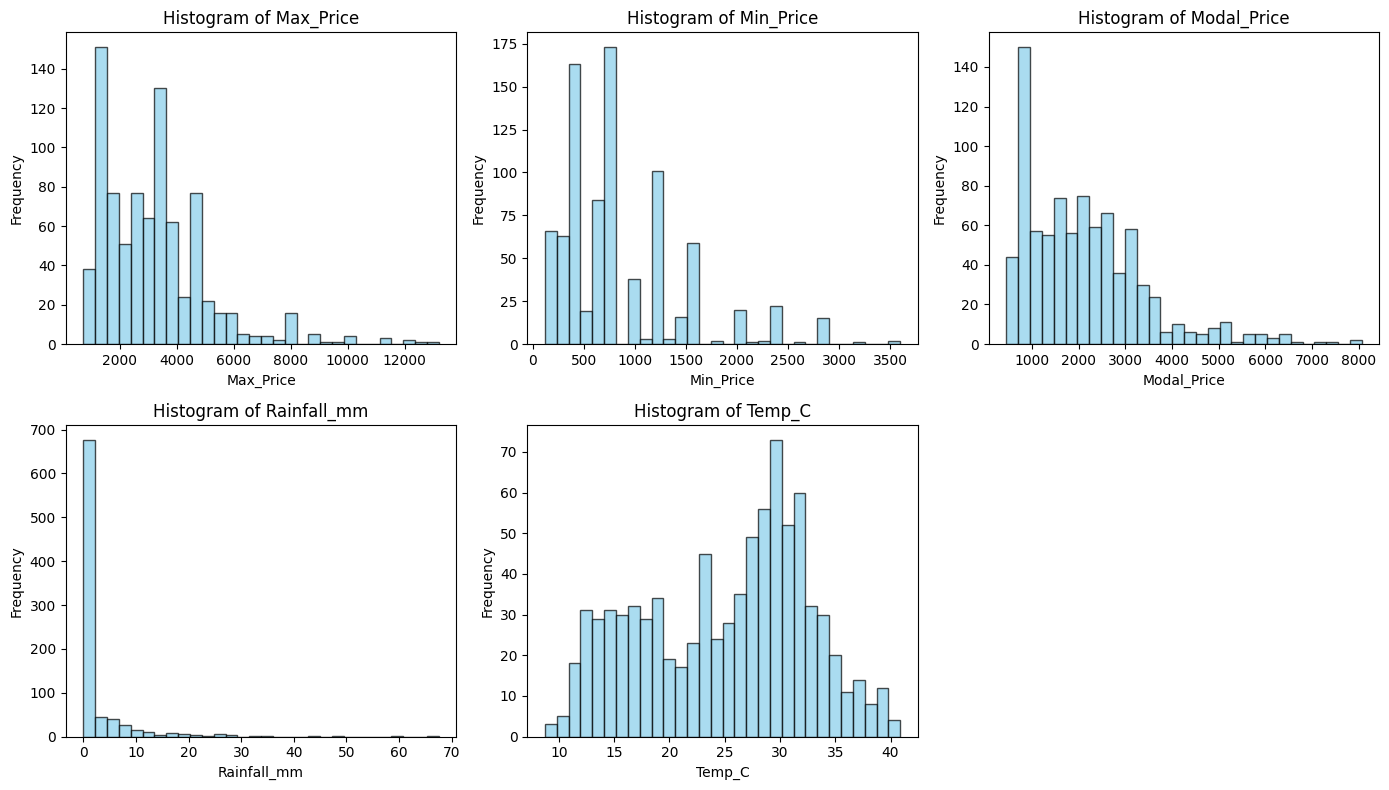

In [15]:
import matplotlib.pyplot as plt

# List of numeric columns
cols_to_plot = ["Max_Price", "Min_Price", "Modal_Price", "Rainfall_mm", "Temp_C"]

plt.figure(figsize=(14,8))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=30, color="skyblue", edgecolor="black", alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


C:\Users\WIN11\AppData\Local\Temp\ipykernel_25972\2570030677.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Festival_Flag", y="Modal_Price", data=df, palette="Set2")


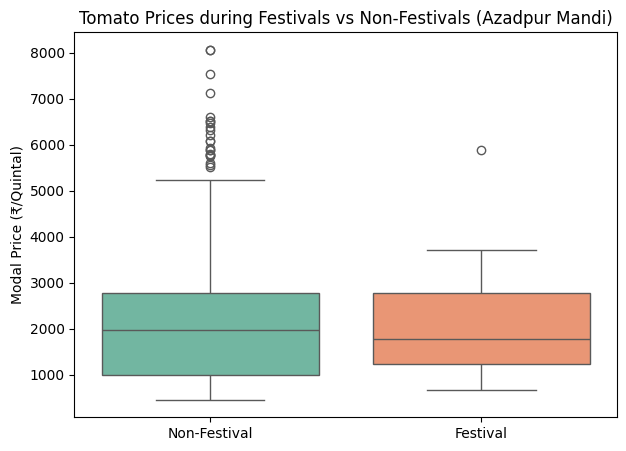

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Festival vs Non-Festival boxplot
plt.figure(figsize=(7,5))
sns.boxplot(x="Festival_Flag", y="Modal_Price", data=df, palette="Set2")

# Set labels
plt.xticks([0,1], ["Non-Festival", "Festival"])
plt.title("Tomato Prices during Festivals vs Non-Festivals (Azadpur Mandi)")
plt.xlabel("")
plt.ylabel("Modal Price (₹/Quintal)")

plt.show()


C:\Users\WIN11\AppData\Local\Temp\ipykernel_25972\3263339649.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Season", y="Modal_Price", data=df, palette="viridis")


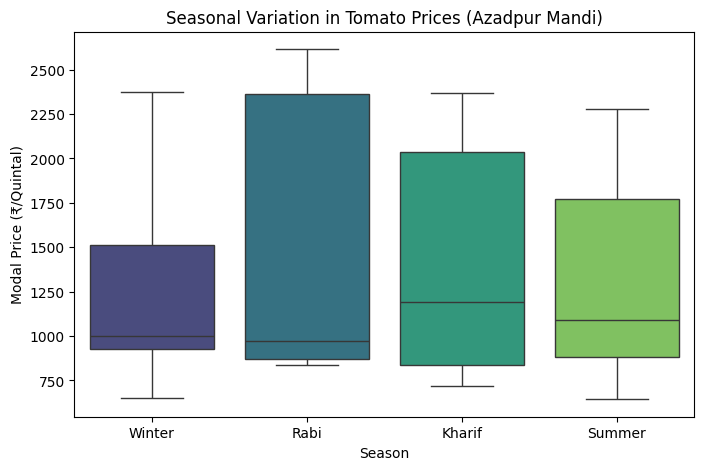

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map Season_Num to names (adjust mapping if needed)
season_map = {
    1: "Winter",
    2: "Rabi",
    3: "Kharif",
    4: "Summer"
}
df["Season"] = df["Season_Num"].map(season_map)

# Seasonal Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x="Season", y="Modal_Price", data=df, palette="viridis")

plt.title("Seasonal Variation in Tomato Prices (Azadpur Mandi)")
plt.xlabel("Season")
plt.ylabel("Modal Price (₹/Quintal)")
plt.show()


In [29]:
import pandas as pd

# Sort by date
df = df.sort_values('Date')

# Create lag features
df['Rainfall_Lag7'] = df['Rainfall_mm'].shift(7)
df['Rainfall_Lag30'] = df['Rainfall_mm'].shift(30)
df['Temp_Lag7'] = df['Temp_C'].shift(7)
df['Temp_Lag15'] = df['Temp_C'].shift(15)

# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)


C:\Users\WIN11\AppData\Local\Temp\ipykernel_25972\71922645.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [30]:
print(df.head(10))


   Year      Month  Day   Day Name  Festival_Flag  Max_Price  Min_Price  \
0  2022  September    1   Thursday              0       2000        600   
1  2022  September    2     Friday              0       2800        800   
2  2022  September    3   Saturday              0       3200        800   
3  2022  September    5     Monday              0       4000        800   
4  2022  September    6    Tuesday              0       3600        800   
5  2022  September    7  Wednesday              0       3600        800   
6  2022  September    8   Thursday              0       3600        800   
7  2022  September    9     Friday              0       4000        800   
8  2022  September   10   Saturday              0       4000        800   
9  2022  September   12     Monday              0       3600        800   

   Modal_Price  Season_Num  Rainfall_mm  Temp_C       Date  Rainfall_Lag7  \
0         1407           9         0.19   32.42 2022-09-01            NaN   
1         1921      

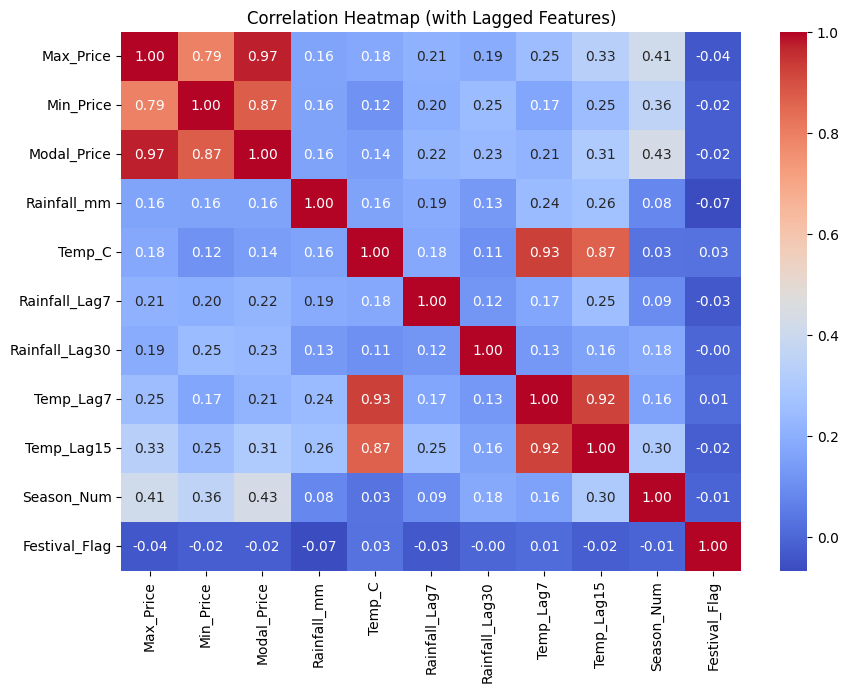

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
num_cols = [
    'Max_Price', 'Min_Price', 'Modal_Price',
    'Rainfall_mm', 'Temp_C',
    'Rainfall_Lag7', 'Rainfall_Lag30',
    'Temp_Lag7', 'Temp_Lag15',
    'Season_Num', 'Festival_Flag'
]

corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (with Lagged Features)")
plt.show()


In [32]:
import pandas as pd
from datetime import timedelta

# Assume your main dataframe is already loaded as df_main
# It has at least: 'Date', 'Modal_Price', etc.

df = df.copy()  # work on a copy to be safe

# 1️⃣ Fixed-date festivals (same date each year)
fixed_festivals = {
    'Christmas': (12, 25),
    'NewYear': (1, 1),
    'Valentine': (2, 14)
}

for fest_name, (month, day) in fixed_festivals.items():
    df[f'{fest_name}_Flag'] = df['Date'].apply(
        lambda x: 1 if abs((x - pd.Timestamp(year=x.year, month=month, day=day)).days) <= 5 else 0
    )

# 2️⃣ Moving-date festivals (exact dates per year)
moving_festivals = {
    'Holi': {
        2022: '2022-03-18',
        2023: '2023-03-08',
        2024: '2024-03-25',
        2025: '2025-03-14'
    },
    'Diwali': {
        2022: '2022-10-24',
        2023: '2023-11-12',
        2024: '2024-11-01',
        2025: '2025-10-20'
    },
    'Navratri': {
        2022: '2022-10-01',
        2023: '2023-09-16',
        2024: '2024-10-02',
        2025: '2025-09-21'
    },
    'Ganesh': {
        2022: '2022-08-31',
        2023: '2023-09-19',
        2024: '2024-09-07',
        2025: '2025-08-27'
    },
    'Dussehra': {
        2022: '2022-10-05',
        2023: '2023-10-24',
        2024: '2024-10-12',
        2025: '2025-10-01'
    },
    'Eid': {
        2022: '2022-05-03',
        2023: '2023-04-22',
        2024: '2024-04-10',
        2025: '2025-03-31'
    }
}

for fest_name, fest_dates in moving_festivals.items():
    df[f'{fest_name}_Flag'] = df['Date'].apply(
        lambda x: 1 if x in pd.date_range(
            start=pd.to_datetime(fest_dates[x.year]) - timedelta(days=5),
            end=pd.to_datetime(fest_dates[x.year]) + timedelta(days=5)
        ) else 0
    )

# ✅ Now df_main has all festival flags added
print(df.head(20))


    Year      Month  Day   Day Name  Festival_Flag  Max_Price  Min_Price  \
0   2022  September    1   Thursday              0       2000        600   
1   2022  September    2     Friday              0       2800        800   
2   2022  September    3   Saturday              0       3200        800   
3   2022  September    5     Monday              0       4000        800   
4   2022  September    6    Tuesday              0       3600        800   
5   2022  September    7  Wednesday              0       3600        800   
6   2022  September    8   Thursday              0       3600        800   
7   2022  September    9     Friday              0       4000        800   
8   2022  September   10   Saturday              0       4000        800   
9   2022  September   12     Monday              0       3600        800   
10  2022  September   13    Tuesday              0       3600        800   
11  2022  September   14  Wednesday              0       4400        800   
12  2022  Se

In [33]:
# List of all festival flags
festival_flags = [
    'Christmas_Flag', 'NewYear_Flag', 'Valentine_Flag',
    'Holi_Flag', 'Diwali_Flag', 'Navratri_Flag',
    'Ganesh_Flag', 'Dussehra_Flag', 'Eid_Flag'
]

# Create interaction features with Season_Num
for fest in festival_flags:
    df[f'Season_{fest.replace("_Flag","")}'] = df['Season_Num'] * df[fest]

# Preview
print(df.head(20))


    Year      Month  Day   Day Name  Festival_Flag  Max_Price  Min_Price  \
0   2022  September    1   Thursday              0       2000        600   
1   2022  September    2     Friday              0       2800        800   
2   2022  September    3   Saturday              0       3200        800   
3   2022  September    5     Monday              0       4000        800   
4   2022  September    6    Tuesday              0       3600        800   
5   2022  September    7  Wednesday              0       3600        800   
6   2022  September    8   Thursday              0       3600        800   
7   2022  September    9     Friday              0       4000        800   
8   2022  September   10   Saturday              0       4000        800   
9   2022  September   12     Monday              0       3600        800   
10  2022  September   13    Tuesday              0       3600        800   
11  2022  September   14  Wednesday              0       4400        800   
12  2022  Se

In [35]:
# Save the dataframe to CSV
df.to_csv('forecasting_dataset_ready.csv', index=False)

print("✅ DataFrame saved as 'forecasting_dataset_ready.csv'")


✅ DataFrame saved as 'forecasting_dataset_ready.csv'


🔹 Top correlations with Modal_Price:

Modal_Price         1.000000
Max_Price           0.972919
Min_Price           0.872379
Season_Num          0.429915
Temp_Lag15          0.305117
Rainfall_Lag30      0.233726
Season_Dussehra     0.218005
Dussehra_Flag       0.217551
Rainfall_Lag7       0.217510
Temp_Lag7           0.212852
Diwali_Flag         0.188073
Season_Diwali       0.185742
Rainfall_mm         0.161022
Temp_C              0.143467
Season_Navratri     0.128775
Navratri_Flag       0.123121
Ganesh_Flag         0.023458
Season_Ganesh       0.020725
Day                 0.009497
Festival_Flag      -0.024100
Christmas_Flag     -0.078103
Season_Christmas   -0.078103
Year               -0.083448
Valentine_Flag     -0.096880
Season_Valentine   -0.096880
NewYear_Flag       -0.099047
Season_NewYear     -0.099047
Holi_Flag          -0.101740
Season_Holi        -0.101740
Season_Eid         -0.135866
Eid_Flag           -0.138660
Name: Modal_Price, dtype: float64


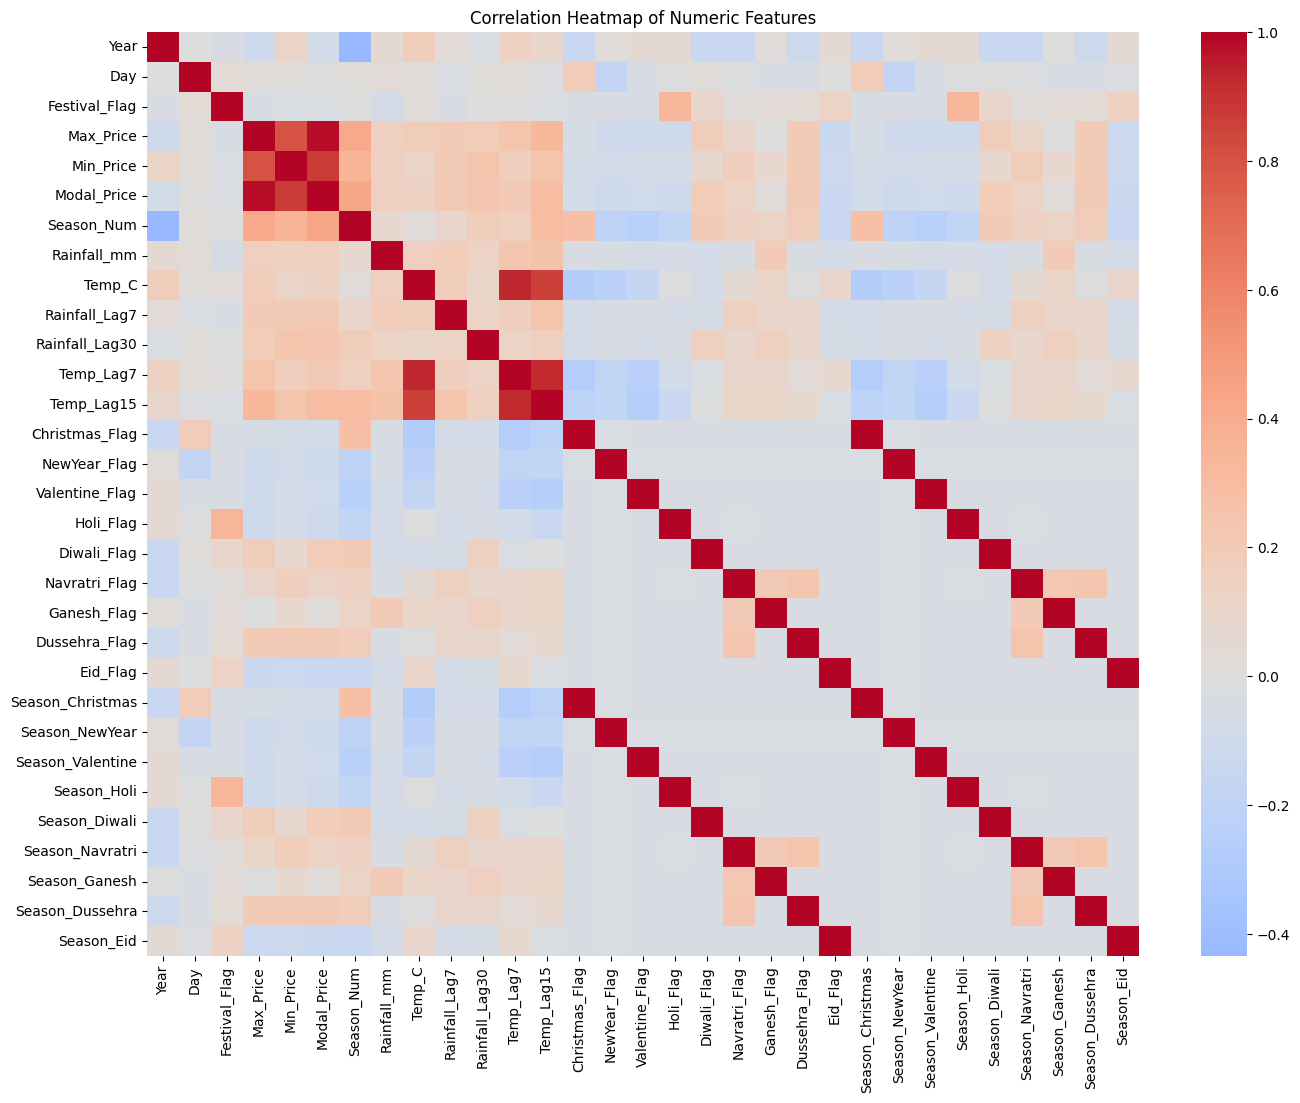

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (if not already in memory)
df = pd.read_csv('forecasting_dataset_ready.csv')

# 1️⃣ Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# 2️⃣ Compute correlation matrix
corr_matrix = numeric_df.corr()

# 3️⃣ Correlation with target
target_corr = corr_matrix['Modal_Price'].sort_values(ascending=False)
print("🔹 Top correlations with Modal_Price:\n")
print(target_corr)

# 4️⃣ Heatmap for all numeric features
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


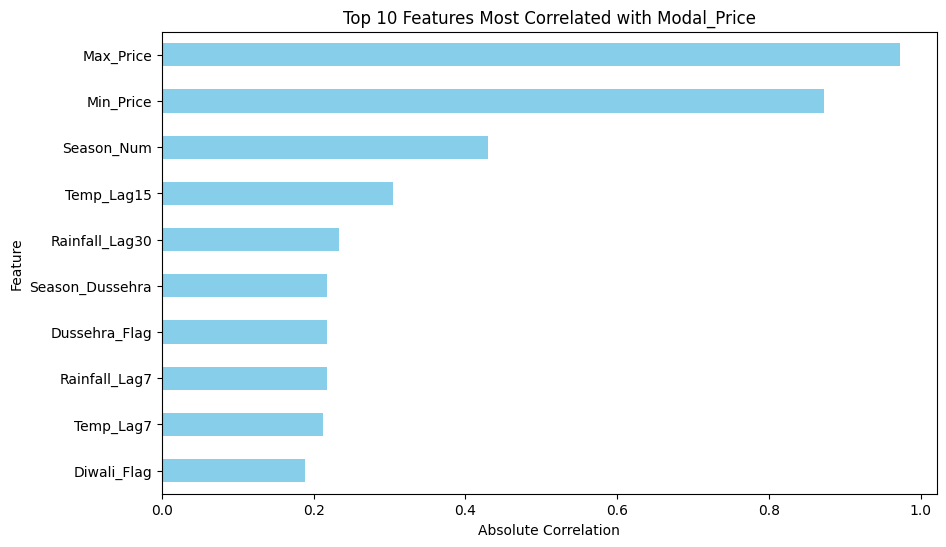

In [38]:
import matplotlib.pyplot as plt

# 1️⃣ Select top 10 features correlated with Modal_Price (excluding Modal_Price itself)
top_features = target_corr.drop('Modal_Price').abs().sort_values(ascending=False).head(10)

# 2️⃣ Bar plot
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Features Most Correlated with Modal_Price')
plt.xlabel('Absolute Correlation')
plt.ylabel('Feature')
plt.show()


In [39]:
# Select numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute skewness
skewness = numeric_df.skew().sort_values(ascending=False)
print("🔹 Skewness of numeric features:\n")
print(skewness)


🔹 Skewness of numeric features:

NewYear_Flag        7.630276
Season_NewYear      7.630276
Holi_Flag           5.594646
Season_Holi         5.594646
Season_Navratri     5.500181
Navratri_Flag       5.475659
Season_Dussehra     5.366128
Dussehra_Flag       5.363141
Valentine_Flag      5.363141
Season_Valentine    5.363141
Season_Eid          5.318516
Rainfall_Lag30      5.288441
Season_Diwali       5.275895
Season_Christmas    5.256513
Diwali_Flag         5.256513
Eid_Flag            5.256513
Christmas_Flag      5.256513
Rainfall_mm         5.244600
Rainfall_Lag7       5.097884
Season_Ganesh       4.898832
Ganesh_Flag         4.879553
Festival_Flag       3.860512
Max_Price           1.516574
Min_Price           1.430677
Modal_Price         1.310244
Day                -0.015066
Season_Num         -0.028183
Year               -0.164535
Temp_Lag15         -0.215818
Temp_Lag7          -0.229518
Temp_C             -0.238268
dtype: float64


In [ ]:
# Detect outliers using IQR method
outliers = {}
for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = numeric_df[(numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)][col].count()

# Convert to DataFrame for easy viewing
outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Outlier_Count']).sort_values(by='Outlier_Count', ascending=False)
print("\n🔹 Outlier counts for numeric features:\n")
print(outliers_df)


🔹 Outlier counts for numeric features:

                  Outlier_Count
Rainfall_Lag30              172
Rainfall_Lag7               163
Rainfall_mm                 160
Festival_Flag                48
Max_Price                    34
Season_Ganesh                32
Ganesh_Flag                  32
Diwali_Flag                  28
Season_Christmas             28
Season_Eid                   28
Season_Diwali                28
Christmas_Flag               28
Eid_Flag                     28
Valentine_Flag               27
Season_Dussehra              27
Dussehra_Flag                27
Season_Valentine             27
Season_Navratri              26
Navratri_Flag                26
Season_Holi                  25
Holi_Flag                    25
Modal_Price                  24
Min_Price                    19
NewYear_Flag                 14
Season_NewYear               14
Temp_Lag7                     0
Temp_Lag15                    0
Day                           0
Year                          0

In [41]:
import numpy as np
import pandas as pd

# Load the dataset (if not already in memory)
df = pd.read_csv('forecasting_dataset_ready.csv')

# List of rainfall-related columns
rainfall_cols = ['Rainfall_mm', 'Rainfall_Lag7', 'Rainfall_Lag30']

# 1️⃣ Cap at 99th percentile
for col in rainfall_cols:
    cap_value = df[col].quantile(0.99)
    df[col] = np.where(df[col] > cap_value, cap_value, df[col])

# 2️⃣ Apply log(1 + x) transformation
for col in rainfall_cols:
    df[col] = np.log1p(df[col])

# 3️⃣ Save the updated dataset
df.to_csv('forecasting_dataset_cleaned.csv', index=False)
print("✅ Dataset saved as 'forecasting_dataset_cleaned.csv' with capped and log-transformed rainfall features.")


✅ Dataset saved as 'forecasting_dataset_cleaned.csv' with capped and log-transformed rainfall features.


In [42]:
# Load cleaned dataset
df = pd.read_csv('forecasting_dataset_cleaned.csv')

# Select numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute skewness
skewness_after = numeric_df.skew().sort_values(ascending=False)
print("🔹 Skewness of numeric features after cleaning:\n")
print(skewness_after)


🔹 Skewness of numeric features after cleaning:

NewYear_Flag        7.630276
Season_NewYear      7.630276
Holi_Flag           5.594646
Season_Holi         5.594646
Season_Navratri     5.500181
Navratri_Flag       5.475659
Season_Dussehra     5.366128
Dussehra_Flag       5.363141
Valentine_Flag      5.363141
Season_Valentine    5.363141
Season_Eid          5.318516
Season_Diwali       5.275895
Season_Christmas    5.256513
Diwali_Flag         5.256513
Eid_Flag            5.256513
Christmas_Flag      5.256513
Season_Ganesh       4.898832
Ganesh_Flag         4.879553
Festival_Flag       3.860512
Rainfall_Lag30      1.806647
Rainfall_Lag7       1.679351
Rainfall_mm         1.637824
Max_Price           1.516574
Min_Price           1.430677
Modal_Price         1.310244
Day                -0.015066
Season_Num         -0.028183
Year               -0.164535
Temp_Lag15         -0.215818
Temp_Lag7          -0.229518
Temp_C             -0.238268
dtype: float64


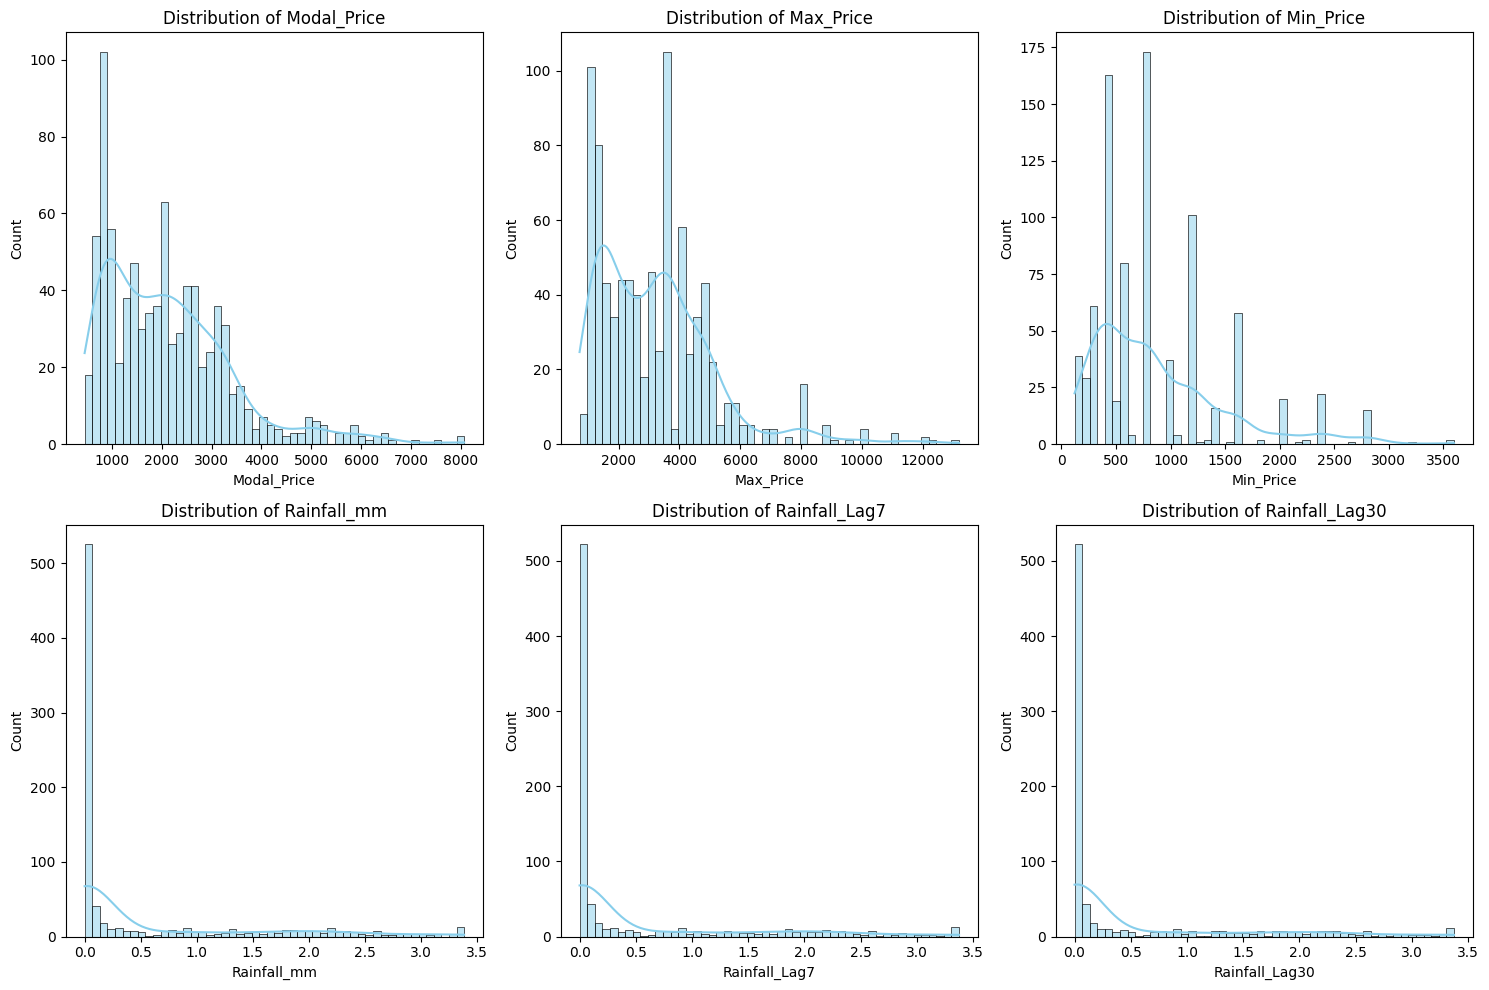

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Key numeric features to visualize
features_to_plot = ['Modal_Price', 'Max_Price', 'Min_Price', 'Rainfall_mm', 'Rainfall_Lag7', 'Rainfall_Lag30']

# Set up the plot grid
plt.figure(figsize=(15, 10))

for i, col in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


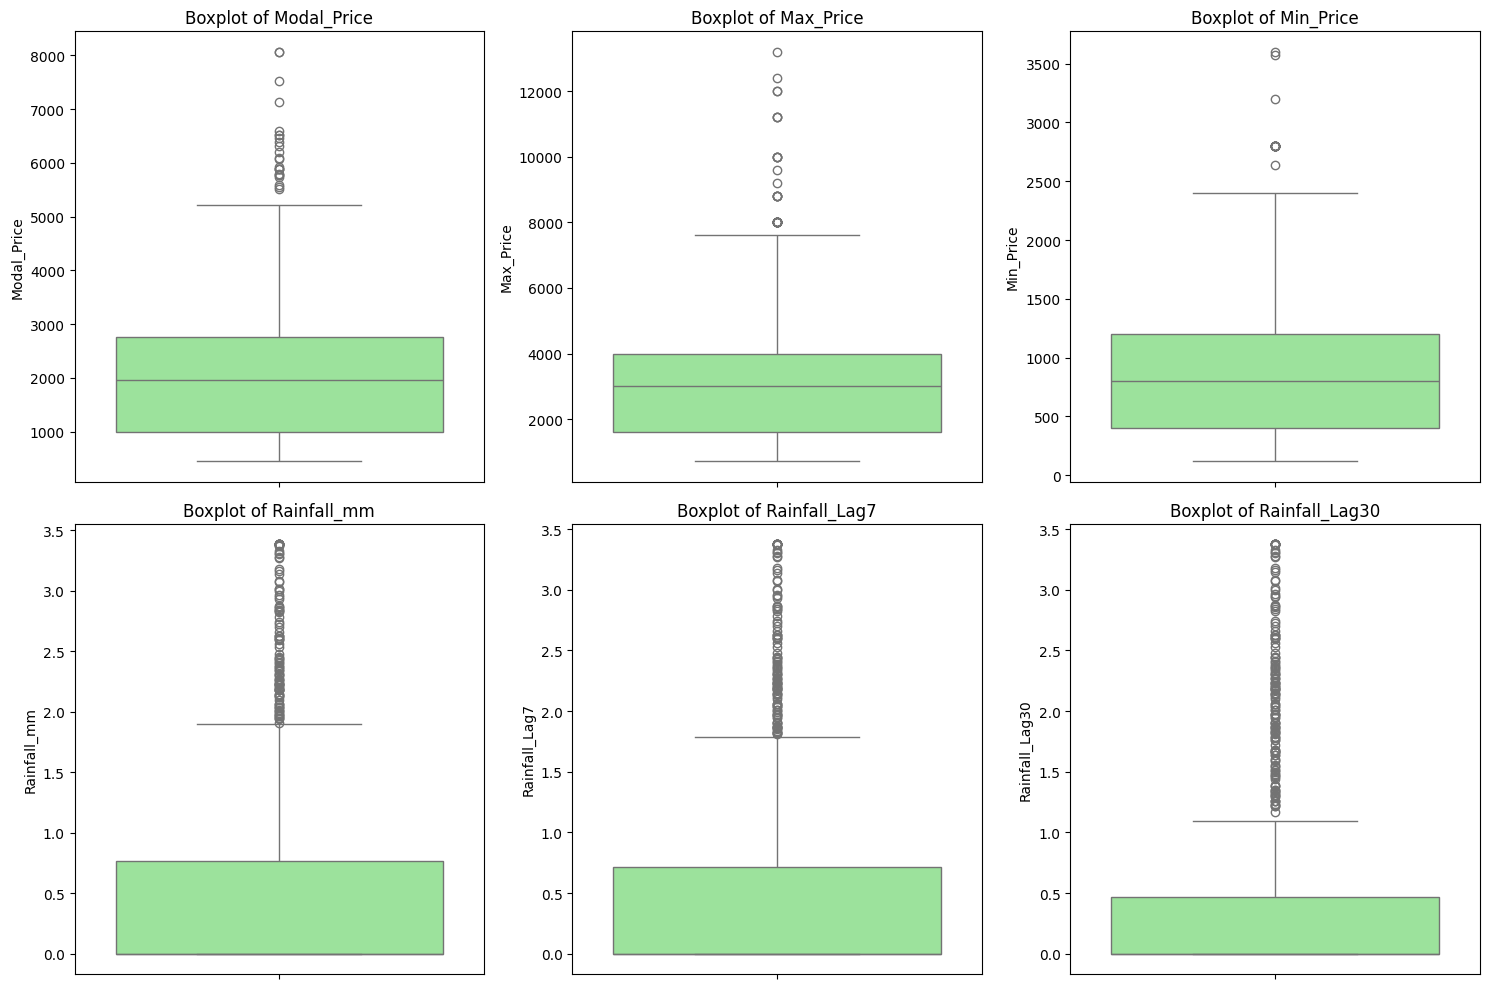

In [44]:
# Set up the plot grid
plt.figure(figsize=(15, 10))

for i, col in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()
